## Resume Screening 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import nltk


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/UpdatedResumeDataSet.csv")


In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Data Science                 40
Blockchain                   40
ETL Developer                40
Sales                        40
Operations Manager           40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

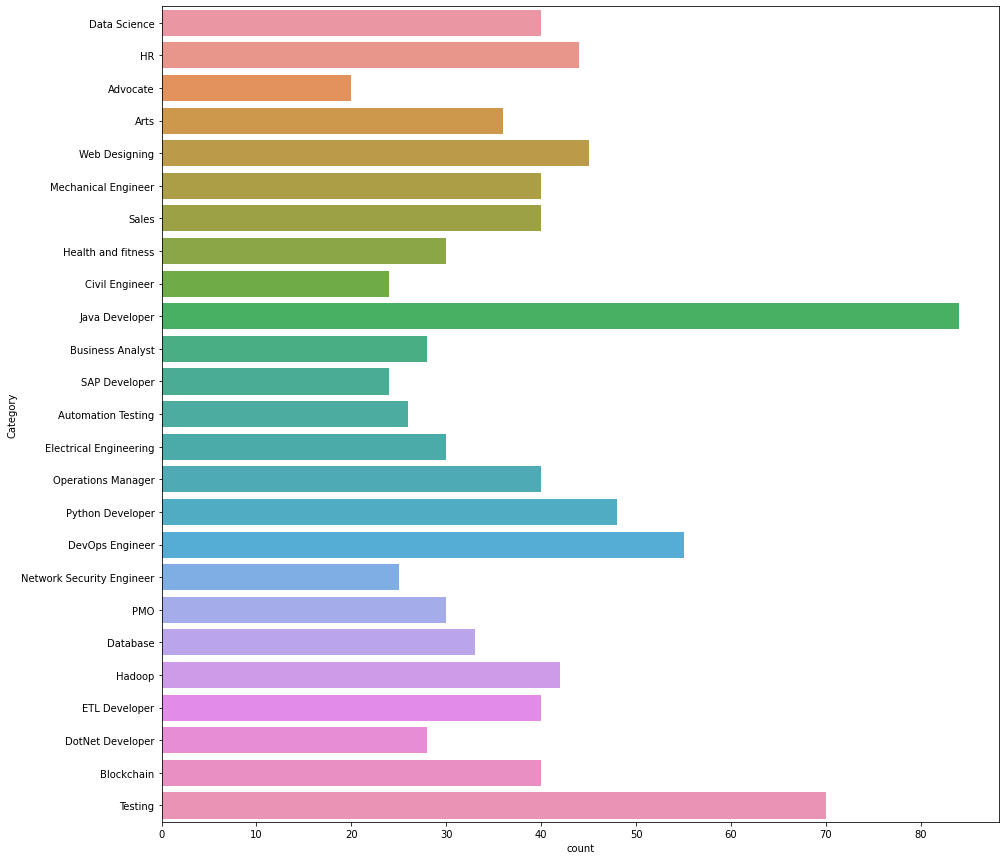

In [8]:
import seaborn as sns 
plt.figure(figsize=(15,15))
plt.xlabel("categories")
plt.ylabel("count")
sns.countplot(y='Category',data=df)

In [9]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
import string 

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
a = df.Category.value_counts()
b = df.Category.unique()


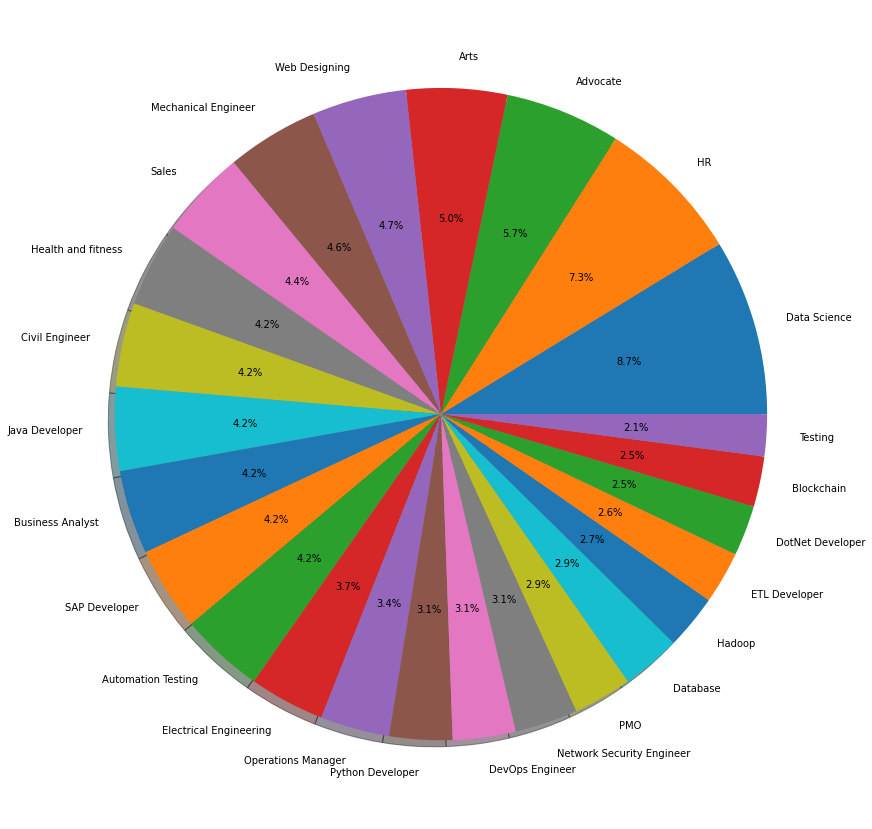

In [24]:
plt.figure(figsize=(15,15))
plt.pie(a, labels=b,autopct='%1.1f%%',shadow=True)
plt.show()

In [25]:
import string 
k = string.punctuation
k

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
import re

In [37]:
lemma = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('http\S+\s*', ' ', df['Resume'][i])  # remove URLs
    review = re.sub('RT|cc', ' ', review)  # remove RT and cc
    review = re.sub('#\S+', '', review)  # remove hashtags
    review = re.sub('@\S+', '  ', review)  # remove mentions
    review = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', review)  # remove punctuations
    review = re.sub(r'[^\x00-\x7f]',r' ', review) 
    review = re.sub('\s+', ' ', review)  # remove extra whitespace
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word)  for word in review if not word in stopwords.words("english")]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
df['Cleaned_resume'] = corpus

In [40]:
df.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [41]:
corpus

['skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3 j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist elerating review process run analytics generate re

In [58]:
from wordcloud import WordCloud

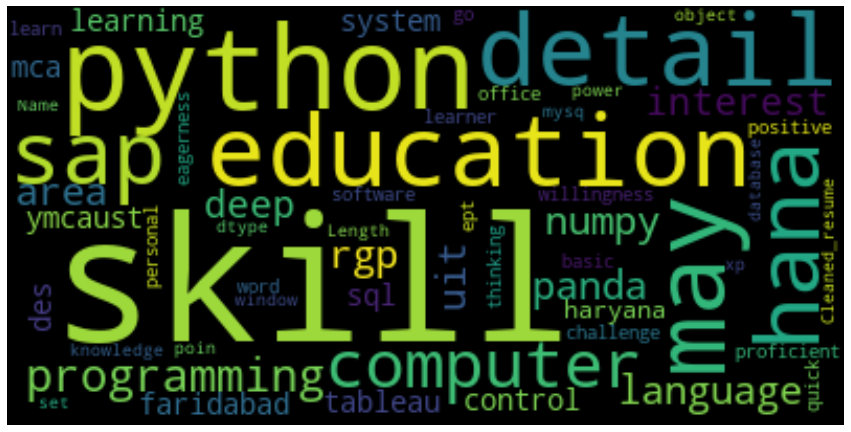

In [59]:
wc = WordCloud().generate(str(df['Cleaned_resume']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


In [67]:
df

,Category,Resume,Cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...
2,6,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...
958,23,â Willingness to accept the challenges. â ...,willingness ept challenge positive thinking go...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge m power poin...


In [64]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [65]:
df['Category'][0]

6

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
text = df['Cleaned_resume']
target = df['Category']

In [74]:
tf = TfidfVectorizer()

In [75]:
data = tf.fit_transform(text).toarray()

In [79]:
data.shape

(962, 6678)

In [80]:
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=42, test_size=0.2)

In [82]:
X_train

array([[0.05522992, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01819369, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [83]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04961778, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [84]:
y_train.head()

468     2
857     3
549    18
280    14
109     1
Name: Category, dtype: int64

In [85]:
y_test.head()

344    15
381    15
351    15
778    13
277    14
Name: Category, dtype: int64

In [86]:
print(X_train.shape)
print(y_train.shape)

(769, 6678)
(769,)


In [87]:
from sklearn.naive_bayes import MultinomialNB
reg = MultinomialNB()

In [88]:
reg.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [90]:
y_train_pred = reg.predict(X_train)


In [91]:
print(accuracy_score(y_train,y_train_pred))

0.9726918075422627


In [92]:
y_test_pred = reg.predict(X_test)

In [94]:
print(accuracy_score(y_test,y_test_pred))

0.9637305699481865


In [96]:
print(confusion_matrix(y_test,y_test_pred))

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11

In [97]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      0.67      0.80         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      0.92      0.96        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.00         8
          17       1.00    